# Student Performance Indicator

### Life cycel of Machine Learning Projects:

#### 1.Understand the Problem Statement
#### 2.Data Collection
#### 3.Data Check to Perform
#### 4.Exploratory Data Analysis 
#### 5.Data Pre-processing
#### 6.Model Training
#### 7.Choose best model

## 1)Problem Statement:
This  Project understands the how student's Performance(test score) is affected by  other variabale such as Gender,Ethnicity,Parent level of education ,Lunch ,Test Performance.

## 2)Data Collection:
-Data Source:
-The Data consist of 8 Column and 1000 rows

## 2.1 Importing data and required Packages
Import Pandas, Numpy , Matplotlib,Seaborn and Warnings Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

## 2.2 Data Information:
- **gender** – Student’s gender (Male/Female)
- **race/ethnicity** – Group or ethnicity of the student
- **parental level of education** – Highest education level of the parent
- **lunch** – Type of lunch (standard or free/reduced)
- **test preparation course** – Whether student completed a test prep course
- **math score** – Score achieved in mathematics
- **reading score** – Score achieved in reading
- **writing score** – Score achieved in writing

# 3.1 Checking Missing Value


In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There is no missing Value


# 3.2 Checking Duplicated Value

In [8]:
df.duplicated().sum()

0

There is No Duplicated value in Dataset

# 3.3 Check Datatypes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# 3.4 Checking Unique value in Columns

In [11]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

# 3.5 Checking Statistic Value

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insights:
- **Mean scores** are around 66–69 across all subjects, showing balanced performance.  
- **Standard deviation (~15)** indicates moderate score variation among students.  
- **Minimum scores** suggest a few low performers (possibly missing test prep or other factors).  
- **Maximum scores (100)** confirm some top achievers in each subject.

# 3.7 Data Explore

In [7]:
# Check unique categories for categorical variables
print("Categories in 'gender' variable:", end=" ")
print(df['gender'].value_counts().to_dict())

print("Categories in 'race/ethnicity' variable:", end=" ")
print(df['race/ethnicity'].value_counts().to_dict())

print("Categories in 'parental level of education' variable:", end=" ")
print(df['parental level of education'].value_counts().to_dict())

print("Categories in 'lunch' variable:", end=" ")
print(df['lunch'].value_counts().to_dict())

print("Categories in 'test preparation course' variable:", end=" ")
print(df['test preparation course'].value_counts().to_dict())

Categories in 'gender' variable: {'female': 518, 'male': 482}
Categories in 'race/ethnicity' variable: {'group C': 319, 'group D': 262, 'group B': 190, 'group E': 140, 'group A': 89}
Categories in 'parental level of education' variable: {'some college': 226, "associate's degree": 222, 'high school': 196, 'some high school': 179, "bachelor's degree": 118, "master's degree": 59}
Categories in 'lunch' variable: {'standard': 645, 'free/reduced': 355}
Categories in 'test preparation course' variable: {'none': 642, 'completed': 358}


In [8]:
# Define Categorial and Numerical columns

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'object']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']

# Print Columns
print("Numerical Features:",len(numerical_features),numerical_features)
print("Categorical Features:",len(categorical_features),categorical_features)

Numerical Features: 3 ['math score', 'reading score', 'writing score']
Categorical Features: 5 ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


# 3.8 Adding 'Total score' and 'Average'

In [15]:
df['Total Score']=df['math score']+df['reading score']+df['writing score']
df['Average']=df['Total Score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score,Average,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,72.666667,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,82.333333,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,92.666667,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,49.333333,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333,76.333333,76.333333


In [16]:
reading_full=df[df['reading score']==100]['Average '].count()
writing_full=df[df['writing score']==100]['Average '].count()
math_full=df[df['math score']==100]['Average'].count()

print(f'Number of students with full score in Reading: {reading_full}')
print(f'Number of students with full score in Writing: {writing_full}')
print(f'Number of students with full score in Math: {math_full}')

Number of students with full score in Reading: 17
Number of students with full score in Writing: 14
Number of students with full score in Math: 7


In [19]:
reading_less=df[df['reading score']<20]['Average '].count()
writing_less=df[df['writing score']<20]['Average '].count()
math_less=df[df['math score']<20]['Average '].count()

print(f'Number of students with less than 20 score in Reading: {reading_less}')
print(f'Number of students with less than 20 score in Writing: {writing_less}')
print(f'Number of students with less than 20 score in Math: {math_leass}')

Number of students with less than 20 score in Reading: 1
Number of students with less than 20 score in Writing: 3
Number of students with less than 20 score in Math: 4


# 4 Exploring Data(Visualization)

## 4.1 Data Vislaization:
- **Histogram** 
- **KDE(kernal Distribution function)** 

**4.1.1 Histogram & KDE**


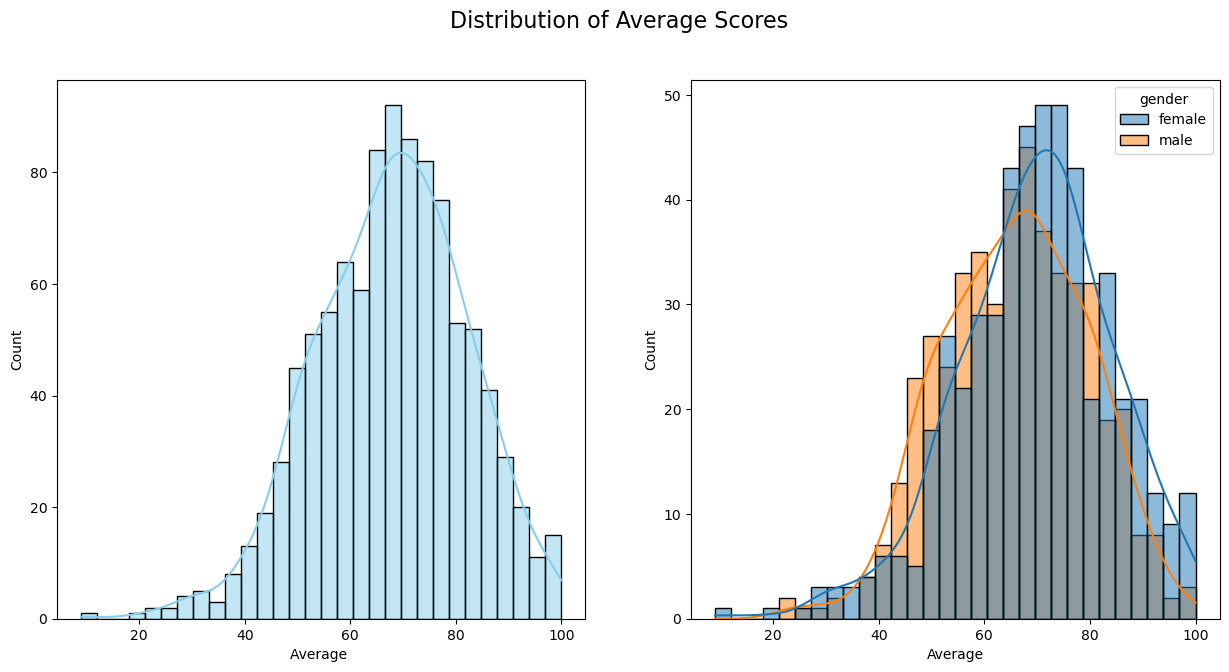

In [22]:
fig,axis=plt.subplots(1,2,figsize=(15,7))
sns.histplot(data=df,x='Average ',bins=30,kde=True,ax=axis[0],color='skyblue')
sns.histplot(data=df,x='Average',bins=30,kde=True,hue='gender',ax=axis[1],color='olive')
plt.suptitle('Distribution of Average Scores',fontsize=16)
plt.show()